<a href="https://colab.research.google.com/github/OpenCV13/dm/blob/main/module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Data Exploration

The following tutorial contains examples of Python code for data exploration. You should refer to the "Data Exploration" chapter of the "Introduction to Data Mining" book (available at https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) to understand some of the concepts introduced in this tutorial notebook. The notebook can be downloaded from http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial3/tutorial3.ipynb.

Data exploration refers to the preliminary investigation of data in order
to better understand its specific characteristics. There are two key motivations for data exploration:
1. To help users select the appropriate preprocessing and data analysis technique used.
2. To make use of humans’ abilities to recognize patterns in the data.

Read the step-by-step instructions below carefully. To execute the code, click on the cell and press the SHIFT-ENTER keys simultaneously.

## 3.1. Summary Statistics

Summary statistics are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers. In this tutorial, we will use the Iris sample data, which contains information on 150 Iris flowers, 50 each from one of three Iris species: Setosa, Versicolour, and Virginica. Each flower is characterized by five attributes:

- sepal length in centimeters

- sepal width in centimeters

- petal length in centimeters

- petal width in centimeters

- class (Setosa, Versicolour, Virginica)

In this tutorial, you will learn how to:

- Load a CSV data file into a Pandas DataFrame object.

- Compute various summary statistics from the DataFrame.

To execute the sample program shown here, make sure you have installed the Pandas library (see Module 2).

**1.** First, you need to download the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">Iris dataset</a> from the UCI machine learning repository.

**<font color='red'>Code:</font>** The following code uses Pandas to read the CSV file and store them in a DataFrame object named data. Next, it will display the first five rows of the data frame.

In [3]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**2.** For each quantitative attribute, calculate its average, standard deviation, minimum, and maximum values.

**<font color="red">Code:</font>**

In [20]:
from pandas.api.types import is_numeric_dtype

# for col in data.columns:
#     if is_numeric_dtype(data[col]):
#         print('%s:' % (col))
#         print('\t Mean = %.2f' % data[col].mean())
#         print('\t Standard deviation = %.2f' % data[col].std())
#         print('\t Minimum = %.2f' % data[col].min())
#         print('\t Maximum = %.2f' % data[col].max())

# print(data['sepal length'].dtype)

for column in data.columns:
    # checks to see if that data type in the column is numeric
    if is_numeric_dtype(data[column]):
        print('%s:' % (column))
        print('\t Mean: %.2f' % data[column].mean())
        print('\t Standard Deviation: %.2f' % data[column].std())
        print('\t Minimum: %.2f' % data[column].min())
        print('\t Maximum: %.2f' % data[column].max())

sepal length:
	 Mean: 5.84
	 Standard Deviation: 0.83
	 Minimum: 4.30
	 Maximum: 7.90
sepal width:
	 Mean: 3.05
	 Standard Deviation: 0.43
	 Minimum: 2.00
	 Maximum: 4.40
petal length:
	 Mean: 3.76
	 Standard Deviation: 1.76
	 Minimum: 1.00
	 Maximum: 6.90
petal width:
	 Mean: 1.20
	 Standard Deviation: 0.76
	 Minimum: 0.10
	 Maximum: 2.50


**3.** For the qualitative attribute (class), count the frequency for each of its distinct values.

**<font color="red">Code:</font>**

In [26]:
data['class'].value_counts()
# data['petal length'].value_counts()
# data['petal width'].value_counts()
# data['sepal length'].value_counts()


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**4.** It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

**<font color="red">Code:</font>**

In [30]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Note that count refers to the number of non-missing values for each attribute.

**5.** For multivariate statistics, you can compute the covariance and correlation between pairs of attributes.

**<font color="red">Code:</font>**

In [53]:
print('Covariance:')
data.cov(numeric_only=True)

Covariance:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [50]:
print('Correlation:')
data.corr(numeric_only=True)

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## 3.2. Data Visualization

Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships
among data items or attributes can be analyzed or reported.

In this tutorial, you will learn how to display the Iris data created in Section 3.1. To execute the sample program shown here, make sure you have installed the matplotlib library package (see Module 0 on how to install Python packages).

**1.** First, we will display the histogram for the sepal length attribute by discretizing it into 8 separate bins and counting the frequency for each bin.

**<font color="red">Code:</font>**

<Axes: >

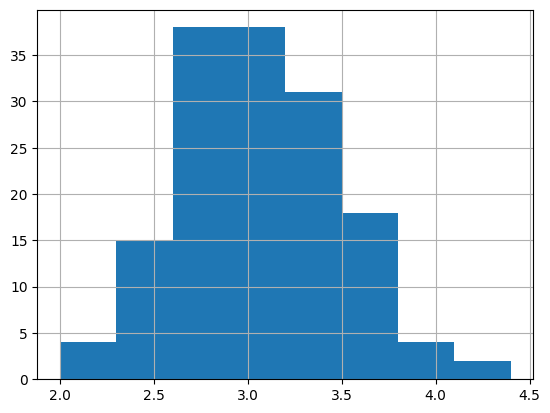

In [75]:
%matplotlib inline

data['sepal width'].hist(bins=8)

**2.** A boxplot can also be used to show the distribution of values for each attribute.

**<font color="red">Code:</font>**

<Axes: >

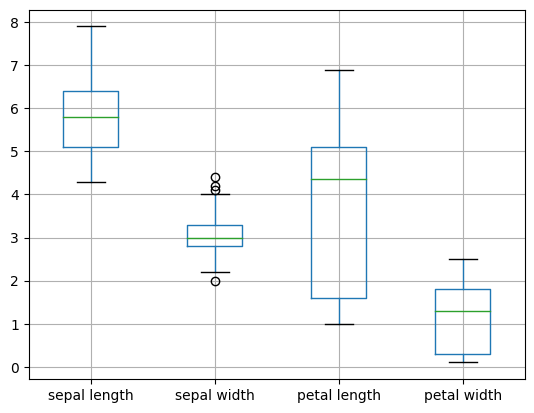

In [64]:
data.boxplot()

**3.** For each pair of attributes, we can use a scatter plot to visualize their joint distribution.

**<font color="red">Code:</font>**

0 0
0 1
1 0
1 1
2 0
2 1


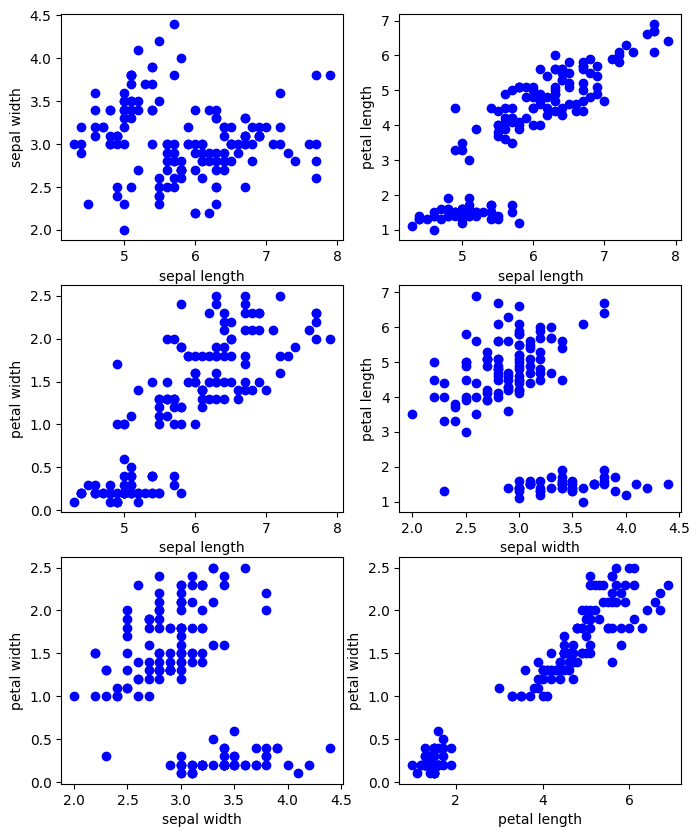

In [168]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(8,10))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        print(ax1, ax2)
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='blue')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

**4.** Parallel coordinates can be used to display all the data points simultaneously. Parallel coordinates have one coordinate axis for each attribute, but the different axes are parallel to one other instead of perpendicular, as is traditional. Furthermore, an object is represented as a line instead of as a point. In the example below, the distribution of values for each class can be identified in a separate color.

**<font color="red">Code:</font>**

<Axes: >

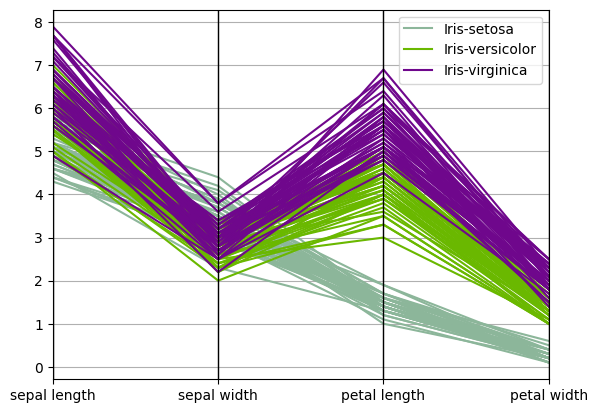

In [76]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')

## 3.3. Summary

This tutorial presents several examples for data exploration and visualization using the Pandas and matplotlib library packages available in Python.

**<font color='blue'>References:</font>**

1. Documentation on Pandas. https://pandas.pydata.org/
2. Documentation on matplotlib. https://matplotlib.org/
3. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

## Homework

**Please do not manually look for answers even if you can.**

In [77]:
# from google.colab import drive
# drive.mount('/content/drive')

In [78]:
import pandas as pd
import numpy as np

In [141]:
happiness_df = pd.read_csv('/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/inclass/week2/happiness_2017.csv')
happiness_df.head()

,Country,Region,Rank,HappinessScore,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Norway,Western Europe,1,7.537,7.578745,11.081789,0.950128,71.086586,0.953017,0.210104,0.249711,0.849100,0.202914,0.717160
1,Denmark,Western Europe,2,7.522,7.593702,10.748989,0.952100,71.662498,0.955416,0.145387,0.181148,0.823667,0.205775,0.572353
2,Iceland,Western Europe,3,7.504,7.476214,10.760409,0.966753,72.755981,0.938783,0.235479,0.726845,0.895255,0.148160,0.365042
3,Switzerland,Western Europe,4,7.494,7.473593,10.955548,0.949661,73.173759,0.924997,0.167875,0.316183,0.773997,0.195871,0.819707
4,Finland,Western Europe,5,7.469,7.788252,10.612338,0.963826,71.696960,0.962199,-0.012174,0.192413,0.787137,0.176066,0.597539


In [83]:
print(happiness_df.shape)
happiness_df.columns

(140, 14)


Index(['Country', 'Region', 'Rank', 'HappinessScore', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government'],
      dtype='object')

### Q-1: Calculating the average, standard deviation, maximum, mininum, median of happiness scores.  
Your solution should only show these statistics for happiness scores.

In [148]:
print('Average: %.2f' % happiness_df['HappinessScore'].mean())
print('Standard Deviation: %.2f' % happiness_df['HappinessScore'].std())
print('Maximum: %.2f' % happiness_df['HappinessScore'].max())
print('Minimum: %.2f' % happiness_df['HappinessScore'].min())
print('Median: %.2f' % happiness_df['HappinessScore'].median())

Average: 5.40
Standard Deviation: 1.11
Maximum: 7.54
Minimum: 2.69
Median: 5.30


### Q-2: What is the name and happiness score of the country with the lowest confidence in their national government?

In [147]:
lowestconfidence = happiness_df[happiness_df['Confidence in national government'] == happiness_df['Confidence in national government'].min()]
print('%s: %.3f' % (lowestconfidence.iloc[0].Country,lowestconfidence.iloc[0].HappinessScore))


Ukraine: 4.096


### Q-3 How many countries are in Western Europe?
This will be very easy with grouping function, but you can still do it without it

In [154]:
happiness_df.loc[happiness_df.Region == "Western Europe"].shape[0]

20

### Q-4: Which two factors have the largest positive correlation and Which two factors have the largest negative correlation?


In [275]:
%matplotlib inline

# build dataframe of the correlations containing only the columns with numerical data
happiness_df_num = happiness_df.corr(numeric_only=True)
happiness_df_num

# fill diagonal with NaN since I am not interested in a attribute's correlation with itself
np.fill_diagonal(happiness_df_num.values, "NaN")
# happiness_df_num

# column and row containing largest positive correlation
max_column = happiness_df_num.max().idxmax()
max_row = happiness_df_num[max_column].idxmax()

# column and row containing largest negative correlation
min_column = happiness_df_num.min().idxmin()
min_row = happiness_df_num[min_column].idxmin()

print('Largest positive correlation: "%s":"%s" at %.4f' % (max_column, max_row, happiness_df_num.max().max()))
print('Largest negative correlation: "%s":"%s" at %.4f' % (min_column, min_row, happiness_df_num.min().min()))



Largest positive correlation: "HappinessScore":"Life Ladder" at 0.9305
Largest negative correlation: "Rank":"HappinessScore" at -0.9930


## Merging data
Let's load the world poulation data.

In [278]:
world_pop_df = pd.read_csv('/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/inclass/week2/world_countries.csv').dropna(axis=1, how='all')
world_pop_df

,Country,Code,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,AFG,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,ALB,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,DZA,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,ASM,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,AND,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Wallis and Futuna,WLF,OCEANIA,16025,274,58.5,47.08,NaN,NaN,3700.0,...,118.6,5.00,25.00,70.00,2.0,NaN,NaN,NaN,NaN,NaN
220,Western Sahara,ESH,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
221,Yemen,YEM,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
222,Zambia,ZMB,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


To extract populations from world_pop_df, we have to merge happiness_df with world_pop_df. As you probably can remember that some of the country names in <code>world_counties.csv</code> and <code>happiness_2007.csv</code>do not match (Optional).

There are 4 kinds of merge: 'inner', 'outer', 'left', and 'right'. We practiced inner merge previously.  

You may find examples from https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html:
Example: US States Data

### Q-5. Which country  has the largest population in Latin America and Caribbean.

### Q-6. Find the average population of East Asia.

In [199]:
import matplotlib.pyplot as plt

happiness_df_num = happiness_df.select_dtypes(include=['int','float64'])
happiness_df_num.corr()


,Rank,HappinessScore,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
Rank,1.000000,-0.992966,-0.925602,-0.808868,-0.785411,-0.788070,-0.509626,-0.115276,0.473557,-0.534311,0.571605,0.138892
HappinessScore,-0.992966,1.000000,0.930529,0.805027,0.796957,0.790131,0.521046,0.147823,-0.503023,0.530417,-0.585881,-0.124755
Life Ladder,-0.925602,0.930529,1.000000,0.751703,0.756073,0.735743,0.568537,0.168043,-0.495680,0.574558,-0.586886,-0.105585
Log GDP per capita,-0.808868,0.805027,0.751703,1.000000,0.752665,0.856382,0.330385,-0.005600,-0.412119,0.311910,-0.556680,-0.225763
Social support,-0.785411,0.796957,0.756073,0.752665,1.000000,0.718873,0.434546,0.091917,-0.328778,0.452329,-0.661736,-0.162458
Healthy life expectancy at birth,-0.788070,0.790131,0.735743,0.856382,0.718873,1.000000,0.340851,0.018353,-0.374465,0.310637,-0.610326,-0.251910
Freedom to make life choices,-0.509626,0.521046,0.568537,0.330385,0.434546,0.340851,1.000000,0.317580,-0.447542,0.686400,-0.424593,0.436355
Generosity,-0.115276,0.147823,0.168043,-0.005600,0.091917,0.018353,0.317580,1.000000,-0.395848,0.277047,-0.142769,0.410432
Perceptions of corruption,0.473557,-0.503023,-0.495680,-0.412119,-0.328778,-0.374465,-0.447542,-0.395848,1.000000,-0.295075,0.371375,-0.429563
Positive affect,-0.534311,0.530417,0.574558,0.311910,0.452329,0.310637,0.686400,0.277047,-0.295075,1.000000,-0.432584,0.170989
